# Import

In [1]:
# Basic
import pandas as pd
import numpy as np

# Data
from catboost import datasets

# Model
from robusta.testing import get_estimator

# Crossval
from sklearn.model_selection import RepeatedStratifiedKFold
from robusta.crossval import *

# Plot
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

Using TensorFlow backend.


# Data

In [2]:
X_train, X_test = datasets.amazon()

y_train = X_train['ACTION']
X_train.drop(columns='ACTION', inplace=True)

X_train.index.name = 'id'
X_test.set_index('id', inplace=True)

X_train

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
id,,,,,,,,,
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325
...,...,...,...,...,...,...,...,...,...
32764,23497,16971,117961,118300,119993,118321,240983,290919,118322
32765,25139,311198,91261,118026,122392,121143,173805,249618,121145
32766,34924,28805,117961,118327,120299,124922,152038,118612,124924


# Task

In [3]:
cv = RepeatedStratifiedKFold(3, 5)
scoring = 'roc_auc'

# Cross-Validation

In [4]:
modelA = get_estimator('LGB', 'classifier', max_depth=3, colsample_bytree=0.3)

resultA = crossval(modelA, cv, X_train, y_train, X_new=X_test, scoring=scoring, 
                   method='predict_proba', train_score=True, verbose=2)

[19:23:31]  LGBMClassifier

[19:23:31]  TRN 1:   0.7999    VAL 1:   0.7473
[19:23:31]  TRN 2:   0.7989    VAL 2:   0.7468
[19:23:31]  TRN 3:   0.8080    VAL 3:   0.7311
[19:23:32]  TRN 4:   0.7999    VAL 4:   0.7489
[19:23:32]  TRN 5:   0.7930    VAL 5:   0.7613
[19:23:32]  TRN 6:   0.8009    VAL 6:   0.7386
[19:23:33]  TRN 7:   0.7943    VAL 7:   0.7465
[19:23:33]  TRN 8:   0.8012    VAL 8:   0.7503
[19:23:33]  TRN 9:   0.7994    VAL 9:   0.7358
[19:23:34]  TRN 10:   0.8062    VAL 10:   0.7474
[19:23:34]  TRN 11:   0.8002    VAL 11:   0.7580
[19:23:34]  TRN 12:   0.7987    VAL 12:   0.7531
[19:23:34]  TRN 13:   0.8016    VAL 13:   0.7314
[19:23:35]  TRN 14:   0.7962    VAL 14:   0.7653
[19:23:35]  TRN 15:   0.8014    VAL 15:   0.7508

[19:23:35]  TRAIN:   0.8000 ± 0.0037
[19:23:35]  VALID:   0.7475 ± 0.0097



In [5]:
modelB = get_estimator('LGB', 'classifier', max_depth=3, colsample_bytree=0.4)

resultB = crossval(modelB, cv, X_train, y_train, X_new=X_test, scoring=scoring, 
                   method='predict_proba', train_score=True, verbose=2)

[19:23:35]  LGBMClassifier

[19:23:35]  TRN 1:   0.8095    VAL 1:   0.7527
[19:23:36]  TRN 2:   0.8013    VAL 2:   0.7515
[19:23:36]  TRN 3:   0.8160    VAL 3:   0.7313
[19:23:36]  TRN 4:   0.8101    VAL 4:   0.7555
[19:23:37]  TRN 5:   0.8034    VAL 5:   0.7620
[19:23:37]  TRN 6:   0.8079    VAL 6:   0.7438
[19:23:37]  TRN 7:   0.8069    VAL 7:   0.7470
[19:23:37]  TRN 8:   0.8108    VAL 8:   0.7477
[19:23:38]  TRN 9:   0.8069    VAL 9:   0.7435
[19:23:38]  TRN 10:   0.8101    VAL 10:   0.7516
[19:23:38]  TRN 11:   0.8014    VAL 11:   0.7576
[19:23:38]  TRN 12:   0.8075    VAL 12:   0.7537
[19:23:39]  TRN 13:   0.8122    VAL 13:   0.7348
[19:23:39]  TRN 14:   0.8011    VAL 14:   0.7634
[19:23:39]  TRN 15:   0.8101    VAL 15:   0.7489

[19:23:40]  TRAIN:   0.8077 ± 0.0042
[19:23:40]  VALID:   0.7497 ± 0.0086



# Compare

<IPython.core.display.Javascript object>


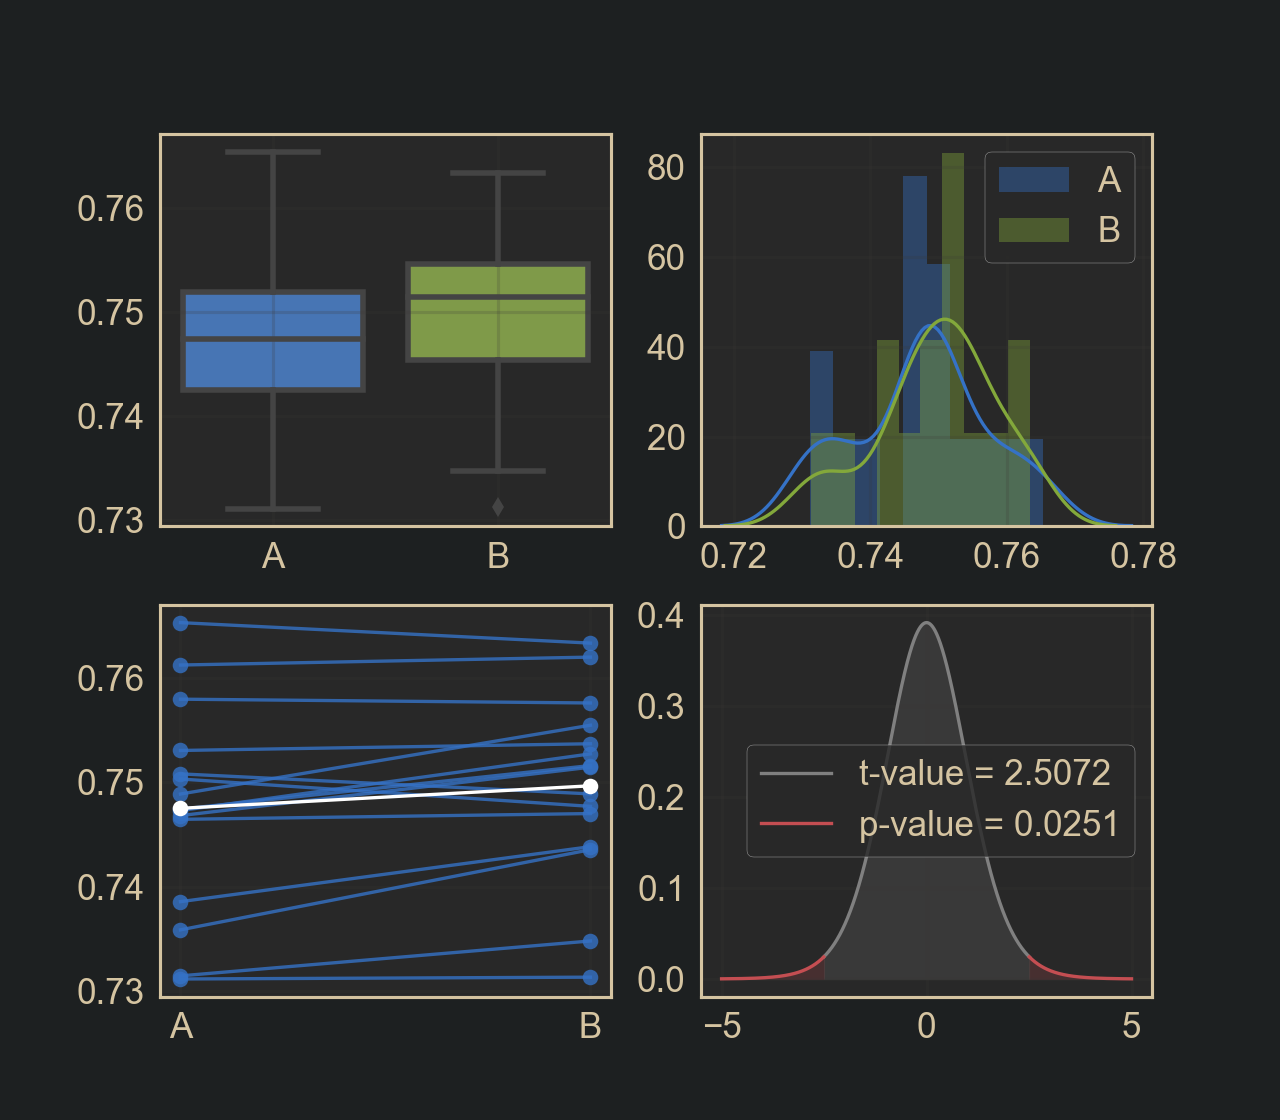

In [6]:
%matplotlib notebook

t, p = compare_ttest(resultA, resultB)

In [7]:
from scipy.stats import nct
help(nct.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.nct_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x

